# 2. Train the same data (but with different data preparation stages) for Convolutional and Fullyconnected NNs.

    Prepare you data, download into folders, preproces, rescale, etc.
    Train fullyconnected NN on your selected dataset in the similar manner to example
    Train convolutional NN on your selected dataset in the similar manner to example


я вирішив зробити свій датасет з зоображень, що вже були на моєму комп'ютері, тому обрав дві категорії - милі котики і мої селфі

![database](1.png)
вийшло по 25 зоображень в кожній катгорії

In [1]:

!pip install tensorflow-datasets


спочатку fullyconnected.

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.4729 - loss: 9.0865 - val_accuracy: 0.5000 - val_loss: 5.0955
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.4757 - loss: 5.5803 - val_accuracy: 0.9000 - val_loss: 0.3657
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8153 - loss: 0.5442 - val_accuracy: 0.8000 - val_loss: 0.7130
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.7552 - loss: 0.4687 - val_accuracy: 0.6000 - val_loss: 1.4039
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8062 - loss: 0.3733 - val_accuracy: 0.9000 - val_loss: 0.2926
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8514 - loss: 0.4355 - val_accuracy: 0.5000 - val_loss: 1.3552
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8368 - loss: 0.3547 - val_accuracy: 0.8000 - val_loss: 1.1418
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s

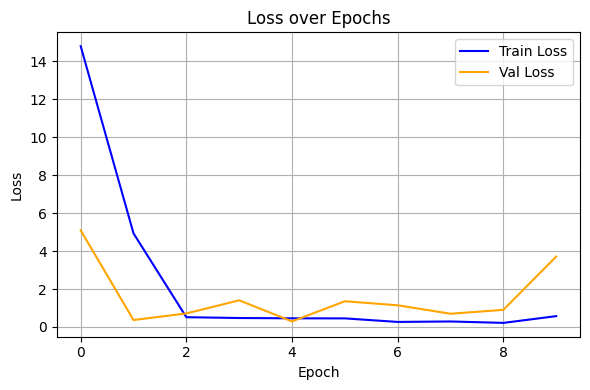

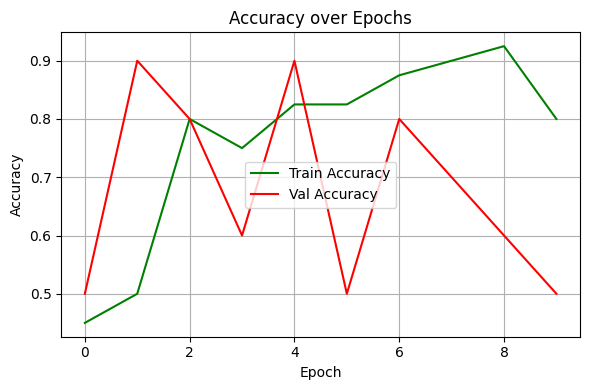

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

data_path = r"D:\Uknord5he\BH3\ml_course\5\dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=8,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=8,
    class_mode="binary",
    subset="validation"
)

model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_plot.png")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("accuracy_plot.png")
plt.show()

тепер convolutional

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.5219 - loss: 1.2328 - val_accuracy: 0.5000 - val_loss: 0.7736
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.5882 - loss: 0.6476 - val_accuracy: 0.9000 - val_loss: 0.5729
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.9073 - loss: 0.4574 - val_accuracy: 0.9000 - val_loss: 0.4615
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.9917 - loss: 0.2368 - val_accuracy: 0.9000 - val_loss: 0.3710
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 1.0000 - loss: 0.1242 - val_accuracy: 0.8000 - val_loss: 0.7659
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 0.0301 - val_accuracy: 0.9000 - val_loss: 0.5406
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.9000 - val_loss: 0.8903
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s

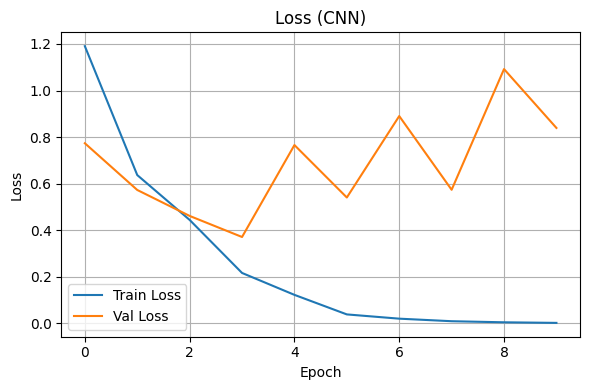

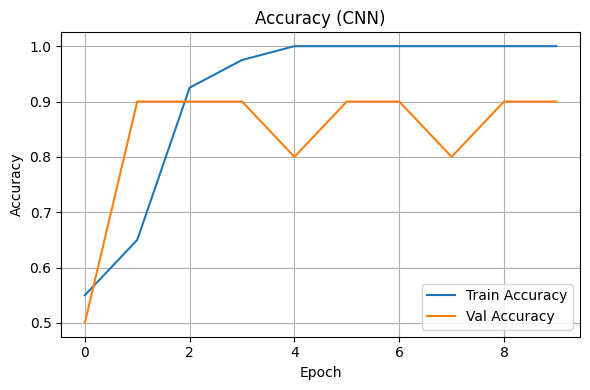

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

data_path = r"D:\Uknord5he\BH3\ml_course\5\dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=8,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=8,
    class_mode="binary",
    subset="validation"
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss (CNN)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy (CNN)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
чомусь вал лосс стрибає, але скинемо це на те що датасет маленький :) в цілому сенс зрозумілий